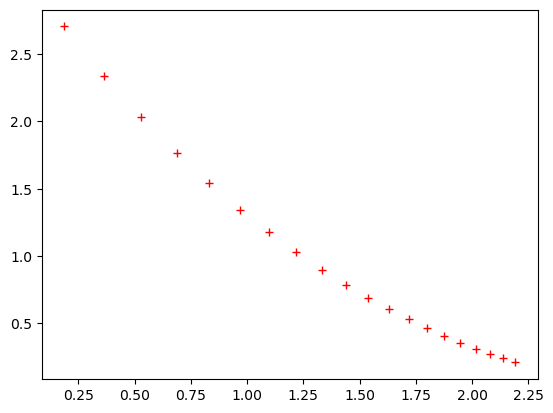

In [100]:
import numpy as np
from sympy import Derivative, Symbol, sympify
import pandas as pd
import matplotlib.pyplot as plt

# yhat = wx + b
# in ML, we don't exactly know what w and B are, we use gradient descent to find

# loss = mean squared error (y -yhat **2) / N(samples) 
 
# data we use to train
x = np.random.randn(10,1)
y = 3*x+np.random.rand() 
# y = 4*x+5

#parameters
w = 0.0 # -> after gradient descent, this should be 2
b = 0.0 # afer gradient descent, this should be whatever B was in y=mx+b 
#hyper parameter

learning_rate = 0.1 # how fast our algorithm learns

def descend(x, y, w, b, learning_rate): 
    dldw = 0.0
    dldb = 0.0 
    N = x.shape[0]
    #loss=(y - yhat)**2=(y-(wx+b))**2
    for xi,yi in zip(x,y):
        dldw += -2*xi*(yi-(w*xi+b))
        dldb += -2*(yi-(w*xi+b))
    # make an update to W param    
    w = w - learning_rate*(1/N)*dldw
    b = b - learning_rate*(1/N)*dldb
    return w,b


df = pd.DataFrame(columns=['epoch', 'loss', 'w', 'b'])

for epoch in range(20):
    w, b = descend(x,y,w,b,learning_rate)
    # work out what prediction is
    yhat = w*x+b
    # calculate loss, mean squared error
    loss = np.divide(np.sum((y-yhat)**2, axis=0), x.shape[0])
    df = pd.concat([df, pd.DataFrame({'epoch':epoch, 'loss': np.round(loss, 6),  'w':w, 'b':b})], ignore_index=True)

plt.plot(df['w'],df['loss'], "r+")
# plt.plot(l,r, "r+")
            
     

